<a href="https://colab.research.google.com/github/Ashu10051998/Bike-sharing-demand-preiction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

Our Goal is find the Count of Rented bikes per hour.

So we set "Rented Bike Count" as our dependent variable and rest as our independent variable.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Data/SeoulBikeData.csv',delimiter=',',encoding= 'unicode_escape')

In [ ]:
data.shape

(8760, 14)

In [ ]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#Looking for missing values 
data.isnull().values.any().sum()

0

From above two codes we get to know that there is not any missing data in our dataframe.So we don't have to worry about the missing values.

In [ ]:
data['Seasons'].value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

The data in season column is equally distributed i.e not biased.So we will can use one hot encoding directly for it.

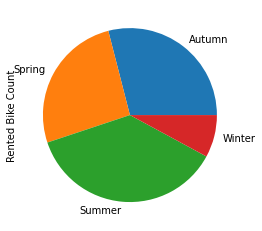

In [ ]:
data.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

In [ ]:
data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
(8328+432)/24

365.0

So we have the data of 1 year ,for each hour.

In [ ]:
data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
holiday_data=data[data['Holiday']=='Holiday']

In [ ]:
holiday_data.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
504,22/12/2017,196,0,-1.7,79,0.5,794,-4.8,0.0,0.0,0.8,Winter,Holiday,Yes
505,22/12/2017,250,1,-1.6,79,0.6,784,-4.7,0.0,0.0,0.8,Winter,Holiday,Yes
506,22/12/2017,161,2,-1.1,79,0.7,736,-4.2,0.0,0.0,0.8,Winter,Holiday,Yes
507,22/12/2017,99,3,-0.6,76,0.5,789,-4.3,0.0,0.0,0.7,Winter,Holiday,Yes
508,22/12/2017,64,4,-0.3,76,0.9,760,-4.0,0.0,0.0,0.7,Winter,Holiday,Yes


In [ ]:
print(holiday_data['Rented Bike Count'].max())
print(holiday_data['Rented Bike Count'].min())

2400
0


In [ ]:
functioning_day=data[data['Functioning Day']=='No']

In [ ]:
functioning_day.head(15)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3144,11/04/2018,0,0,14.4,82,4.6,1041,11.3,0.00,0.0,0.0,Spring,No Holiday,No
3145,11/04/2018,0,1,13.6,81,3.6,886,10.3,0.00,0.0,0.0,Spring,No Holiday,No
3146,11/04/2018,0,2,12.7,80,3.9,885,9.3,0.00,0.0,0.0,Spring,No Holiday,No
3147,11/04/2018,0,3,11.6,81,3.1,687,8.4,0.00,0.0,0.0,Spring,No Holiday,No
3148,11/04/2018,0,4,10.2,83,3.5,554,7.4,0.00,0.0,0.0,Spring,No Holiday,No
3149,11/04/2018,0,5,9.7,84,1.7,447,7.1,0.00,0.0,0.0,Spring,No Holiday,No
3150,11/04/2018,0,6,9.0,86,2.0,442,6.7,0.00,0.0,0.0,Spring,No Holiday,No
3151,11/04/2018,0,7,8.8,85,1.1,438,6.4,0.11,0.0,0.0,Spring,No Holiday,No
3152,11/04/2018,0,8,9.7,77,1.6,519,5.8,0.68,0.0,0.0,Spring,No Holiday,No
3153,11/04/2018,0,9,11.8,59,2.1,975,4.0,1.44,0.0,0.0,Spring,No Holiday,No


In [ ]:
functioning_day['Rented Bike Count'].value_counts()

0    295
Name: Rented Bike Count, dtype: int64

So we see that that At functioning day having value 'No' no bike is rented.
So these data rows have functioning day 'No' have no efffect on our dataset.

So we can remove the data/rows having functioning day 'NO'.


There after we can also remove the colum 'Functioning day' since the dataset remaining have all functining days as 'yes'.So it wont effect our data analysis.

In [ ]:
data['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
#Removing the rows having 'Functioning Day' as 'No"
data.drop(functioning_day.index ,inplace=True)

In [ ]:
data.shape

(8465, 14)

So our new dataset is modified.earlier it had 8760 rows now it has 8465 rows.So 295 rows has been deleted.

Now we will remove the functioning day column

In [ ]:
#dropping the 'functioning Day'  column
data = data.drop(columns="Functioning Day")

In [ ]:
data.shape

(8465, 13)

In [ ]:
data.head(15)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday


so we see that the column named 'functioning Day' is  removed and the number of columns is reduced to 13.

Now we will do the one hot  encoding for 'Seasons' and 'Holiday' columns.

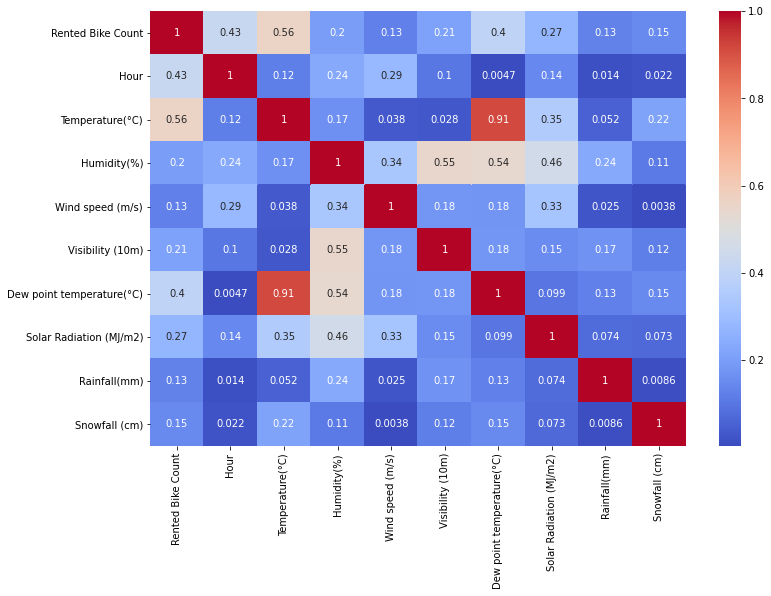

In [ ]:
plt.figure(figsize=(12,8))
correlation=data.corr()
sns.heatmap(abs(correlation),annot=True,cmap='coolwarm')

As mentioned on top that we have the rented bike count as dependent variable and rest are independent variable.

So,from the heatmap we see that there is a multicollinearity problem and Dew point temprature. The correlation betweeen them is 0.91.  So we have to drop one of the following column

The correlation between Rented bike count and Temperature is 0.56.

And the correlation between Rented bike count and Dew point Temperature is 0.4

So we will drop the Dew point Temperature column.

In [ ]:
#dropping the Dew point temperature(°C) column
data = data.drop(columns="Dew point temperature(°C)")

In [ ]:
data.shape

(8465, 12)

So our dataset have now reduce to 12 columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


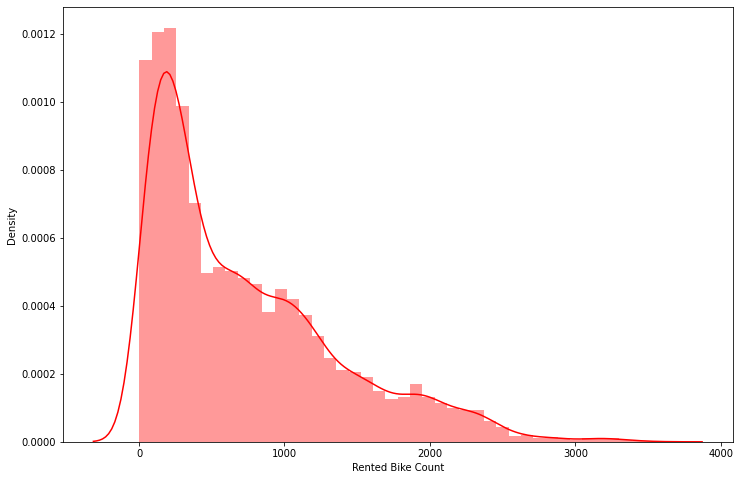

In [ ]:
#Doing some EDA on dependent variable

plt.figure(figsize=(12,8))
sns.distplot(data['Rented Bike Count'],color='r')

The data is highly positively skewed.So we will do the square root transformation on this dependent variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


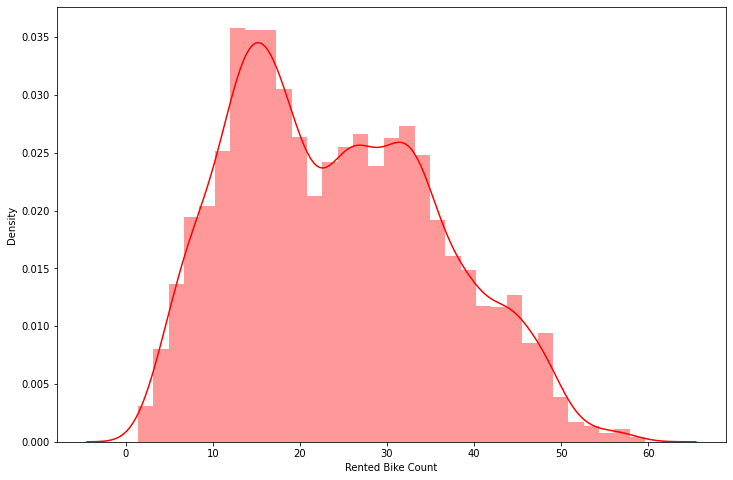

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(np.sqrt(data['Rented Bike Count']),color='r')

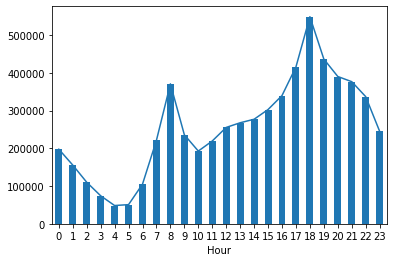

In [ ]:
data.groupby('Hour').sum()['Rented Bike Count'].plot.bar()
data.groupby('Hour').sum()['Rented Bike Count'].plot()

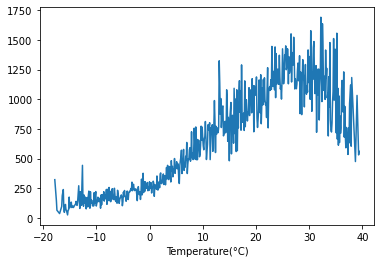

In [ ]:
data.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

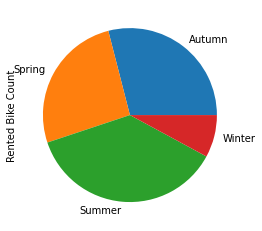

In [ ]:
data.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

In [ ]:
# One hot encoding
data = pd.get_dummies(data, columns=["Seasons", "Holiday"])

In [ ]:
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,1,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,0,1,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,0,1,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,0,1,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,1,0,0,0,0,1
8756,30/11/2018,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,1,0,0,0,0,1
8757,30/11/2018,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,1,0,0,0,0,1
8758,30/11/2018,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,1,0,0,0,0,1


In [ ]:
#we can also drop the date column as it won't affect our ML model
data = data.drop(columns="Date")
data.shape

(8465, 15)

In [ ]:
data.shape

(8465, 15)

In [ ]:
data.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday',
       'Holiday_No Holiday'],
      dtype='object')

In [ ]:
x=data.drop(columns='Rented Bike Count')

In [ ]:
y=data['Rented Bike Count']**0.5

In [ ]:
x.shape

(8465, 14)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#Applying Linear Regression Model

In [ ]:
regressor=LinearRegression()

In [ ]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.intercept_

21.693577261418223

In [ ]:
regressor.coef_

array([ 5.15944166e-01,  4.93395352e-01, -1.69763390e-01,  9.61081405e-02,
       -1.25779750e-04, -9.21571108e-01, -1.65390267e+00,  2.44156112e-01,
        3.57949621e+00,  3.78584834e-01,  4.74870686e-01, -4.43295173e+00,
       -1.21920400e+00,  1.21920400e+00])

In [ ]:
y_train_pred=regressor.predict(x_train)
y_test_pred=regressor.predict(x_test)

#After fitting the model, we print the score between predictions and test targets

In [ ]:
train_set_rmse = (np.sqrt(mean_squared_error(y_train_pred,y_train )))
train_set_r2 = r2_score(y_train, y_train_pred)
print('Linear model, R2 train score is : {} and the train root mean square is: {}'
     .format(train_set_r2,train_set_rmse))

test_set_rmse = (np.sqrt(mean_squared_error(y_test_pred,y_test )))
test_set_r2 = r2_score(y_test, y_test_pred)
print('Linear model, R2 test score is : {} and the test root mean square is: {}'
     .format(test_set_r2,test_set_rmse))

Linear model, R2 train score is : 0.6181083838975845 and the train root mean square is: 7.3437873547771675
Linear model, R2 test score is : 0.608645402393953 and the test root mean square is: 7.367488815090728


In [ ]:
from sklearn.metrics import mean_squared_error

MSE_test  = mean_squared_error(y_test, y_test_pred)
print("MSE :" , MSE)


MSE : 54.27989144048698
RMSE : 7.367488815090728


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


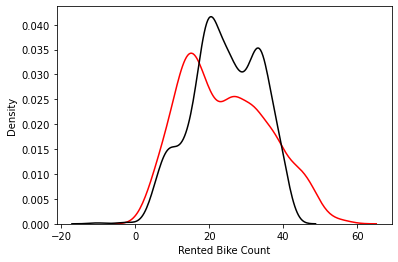

In [ ]:
ax1=sns.distplot(y_test,hist=False,color='red',label="Actual")
sns.distplot(y_test_pred,hist=False,color='black',label="Predicted",ax=ax1)

#Applying Ridge Regression

In [ ]:
ridge=Ridge()
parameters={'alpha':list(range(-300,300))}

gridSearchRidge=GridSearchCV(ridge,parameters,scoring='r2',cv=5)
ridge1=gridSearchRidge.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.41033e-24): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.07405e-24): result may not be accurate.
  overwrite_a=True).T


In [ ]:
y_train_ridge_pred=ridge1.predict(x_train)
y_test_ridge_pred=ridge1.predict(x_test)

In [ ]:
best_ridge=gridSearchRidge.best_estimator_
bestridge_testScore=best_ridge.score(x_test,y_test)

In [ ]:
print('The best R2 train score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(gridSearchRidge.best_score_,gridSearchRidge.best_params_['alpha']))
print('The best R2 test score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(bestridge_testScore,gridSearchRidge.best_params_['alpha']))

The best R2 train score is : 0.62
 with Alpha = 0.00
 
The best R2 test score is : 0.61
 with Alpha = 0.00
 


In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test,y_test_ridge_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 54.27989144048698
RMSE : 7.367488815090728


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


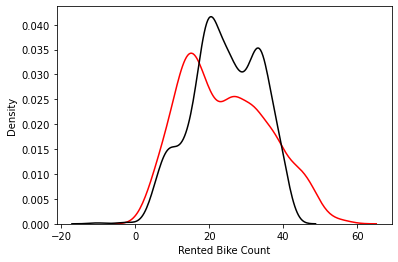

In [ ]:
ax1=sns.distplot(y_test,hist=False,color='red',label="Actual")
sns.distplot(y_test_ridge_pred,hist=False,color='black',label="Predicted",ax=ax1)

In [ ]:
import math

#Applying Lasso Model

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso= GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
lasso.score(x_train, y_train)

-53.93648426602697

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -54.213961722629186


In [ ]:
y_pred_lasso = lasso.predict(x_test)

In [ ]:
print('The best R2 train score is : {:.2f} with Alpha = {:.2f}\n \
'.format(gridSearchLasso.best_score_,gridSearchLasso.best_params_['alpha']))
print('The best R2 test score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(bestLasso_testScore,gridSearchLasso.best_params_['alpha']))

The best R2 train score is : 0.62 with Alpha = 0.00
 
The best R2 test score is : 0.61
 with Alpha = 0.00
 


In [ ]:
MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 54.31451556539328
RMSE : 7.36983823196909


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


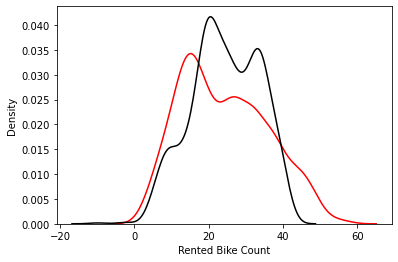

In [ ]:
ax3=sns.distplot(y_test,hist=False,color='red',label="Actual")
sns.distplot(y_pred_lasso,hist=False,color='black',label="Predicted",ax=ax3)

#Decision Tree Regressor

In [ ]:
from sklearn import preprocessing

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
scalerTrain = preprocessing.StandardScaler().fit(x_train)
scalerTest = preprocessing.StandardScaler().fit(x_test)
x_train_Scaled=scalerTrain.transform(x_train)
x_test_Scaled=scalerTest.transform(x_test)

In [ ]:
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7,10,15,20]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=5)
model=gridSearch_decisionTree.fit(x_train_Scaled,y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(x_test_Scaled,y_test)

In [ ]:
y_decission_tree_predicted = model.predict(x_test_Scaled)

In [ ]:
MSE  = mean_squared_error(y_test,y_decission_tree_predicted)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 27.04458302115683
RMSE : 5.2004406564402625


In [ ]:
MSE = np.square(np.subtract(x_test,y_test)).mean() 

In [ ]:
print('The best Decision Tree R2 score is : {:.2f} with max depth = {:.2f} \n \
'.format(gridSearch_decisionTree.best_score_,gridSearch_decisionTree.best_params_['max_depth'] ))
print('The best R2 test score is : {:.2f}\n with max depth = {:.2f}\n \
'.format(bestDecisionTree_testScore,gridSearch_decisionTree.best_params_['max_depth']))

The best Decision Tree R2 score is : 0.83 with max depth = 10.00 
 
The best R2 test score is : 0.81
 with max depth = 10.00
 


#Random Forest Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
randomForestAlgo = RandomForestRegressor()


param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=50, num=10)], 
         'max_depth' : [80,90,100],
         'min_samples_split':[2,4,6],
         'min_samples_leaf':[1,2,3],
         'bootstrap' : [True,False]
        }

gridSearch_RandomForest=RandomizedSearchCV(randomForestAlgo,param,scoring='r2',cv=3)
model2=gridSearch_RandomForest.fit(x_train_Scaled,y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(x_test_Scaled,y_test)

In [ ]:
print('The best Random Forest R2 train score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(gridSearch_RandomForest.best_score_,gridSearch_RandomForest.best_params_['n_estimators'],gridSearch_RandomForest.best_params_['max_depth'],gridSearch_RandomForest.best_params_['min_samples_split'],gridSearch_RandomForest.best_params_['min_samples_leaf'] ))
print('The best Random Forest R2 test score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(bestRandomForest_testScore,gridSearch_RandomForest.best_params_['n_estimators'],gridSearch_RandomForest.best_params_['max_depth'],gridSearch_RandomForest.best_params_['min_samples_split'],gridSearch_RandomForest.best_params_['min_samples_leaf'] ))

The best Random Forest R2 train score is : 0.88 with n estimators = 32.00, max depth : 100.00, min samples split : 4 and min samples leaf : 2  
 
The best Random Forest R2 test score is : 0.86 with n estimators = 32.00, max depth : 100.00, min samples split : 4 and min samples leaf : 2  
 


In [ ]:
y_random_forest_predicted = model2.predict(x_test_Scaled)

In [ ]:
MSE  = mean_squared_error(y_test,y_random_forest_predicted)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 19.110092541857348
RMSE : 4.3715091835494695


#Conclusion
The dependent variable "Y" is highly positively skewed,so we use squareroot transformation on it.

Dew point temperature is highly correleted to one other independent variable,so this column is dropped.

Linear regression is not overfitting our data.It performs same for train as well as on test data.

Learning rate "Alpha" is zero for both ridge and lasso regression.

r2 score is highest for random forest regression model.

Random forest regression models fits our dataset well.